In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys

# Enable better display in the notebook
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# Get the absolute path to the project root (parent of notebooks directory)
project_root = os.path.abspath('..')
print(f"Project root: {project_root}")

# Add the scripts directory to the Python path so we can import our module
sys.path.append(project_root)

Project root: /Users/jay/Documents/perp_arb


In [3]:
# Import our analyzer class
from scripts.analysis.futures_premium import FuturesPremiumAnalyzer

# Initialize the analyzer with our project root directory
analyzer = FuturesPremiumAnalyzer(base_dir=project_root)

# Check if the data files exist
spot_path = os.path.join(project_root, "data/raw/ETHUSDT/1d/", "spot.csv")
futures_path = os.path.join(project_root, "data/processed/ETHUSDT/1d/", "futures_index_1d.csv")

print(f"Checking spot data file: {os.path.exists(spot_path)}")
print(f"Checking futures data file: {os.path.exists(futures_path)}")

Checking spot data file: True
Checking futures data file: True


In [5]:
# Define custom data loading function with your actual file paths
def custom_load_data(self, asset='ETHUSDT', timeframe='1d'):
    # Your actual file paths
    spot_csv = os.path.join(self.base_dir, f"data/raw/{asset}/{timeframe}/spot.csv")
    futures_csv = os.path.join(self.base_dir, f"data/processed/{asset}/{timeframe}/futures_index_1d.csv")
    
    print(f"Loading from: \n - {spot_csv}\n - {futures_csv}")
    
    # Load data
    spot_df = pd.read_csv(spot_csv, parse_dates=["Timestamp"])
    futures_df = pd.read_csv(futures_csv, parse_dates=["Timestamp"])
    
    # Add days_till_expiry column if it doesn't already exist
    if 'days_till_expiry' not in futures_df.columns:
        print("Warning: 'days_till_expiry' column not found. Please check your data.")
    
    print(f"Loaded {len(futures_df)} futures records and {len(spot_df)} spot records")
    return futures_df, spot_df

# Replace the default load_data method with our custom one
analyzer.load_data = custom_load_data.__get__(analyzer)

Analyzing ETHUSDT futures premium...
Loading from: 
 - /Users/jay/Documents/perp_arb/data/raw/ETHUSDT/1d/spot.csv
 - /Users/jay/Documents/perp_arb/data/processed/ETHUSDT/1d/futures_index_1d.csv
Loaded 624 futures records and 649 spot records

Summary by Contract:
                premium_pct_mean  premium_pct_std  premium_pct_min  \
Contract                                                             
ETHUSDT_230929          0.549481         0.458556        -0.123230   
ETHUSDT_231229          0.716041         0.292873         0.038998   
ETHUSDT_240329          1.815475         1.057093         0.025558   
ETHUSDT_240628          1.827401         1.730377        -0.013332   
ETHUSDT_240927          1.157285         0.912134         0.017442   
ETHUSDT_241227          1.345654         0.491648         0.053073   
ETHUSDT_250328          1.490225         0.936584         0.204414   

                premium_pct_max  premium_pct_count  implied_rate_pct_mean  \
Contract                    

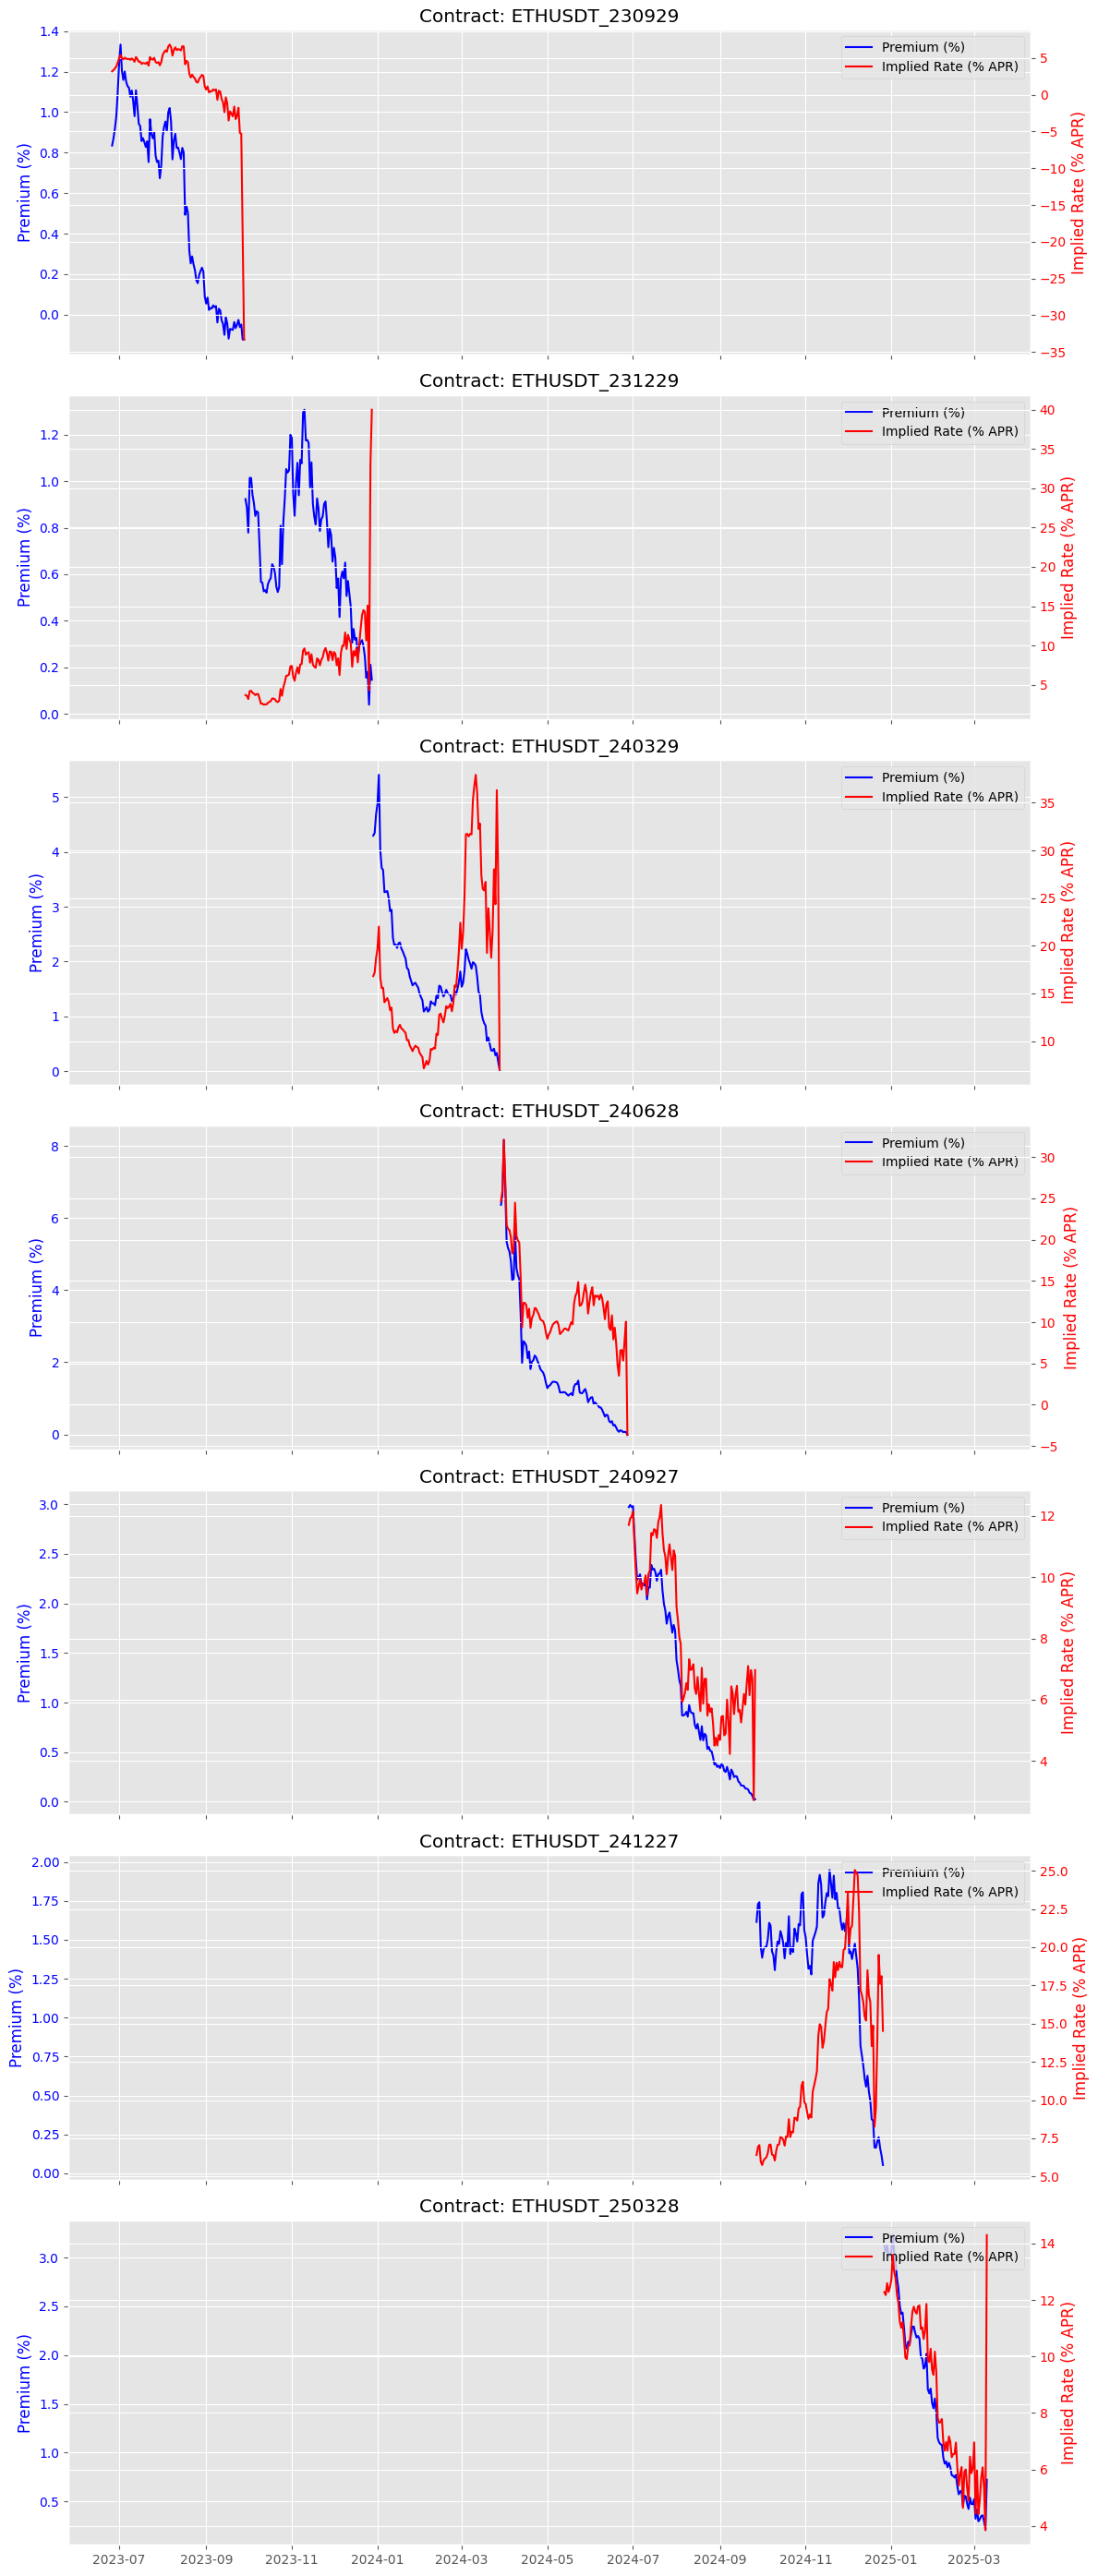

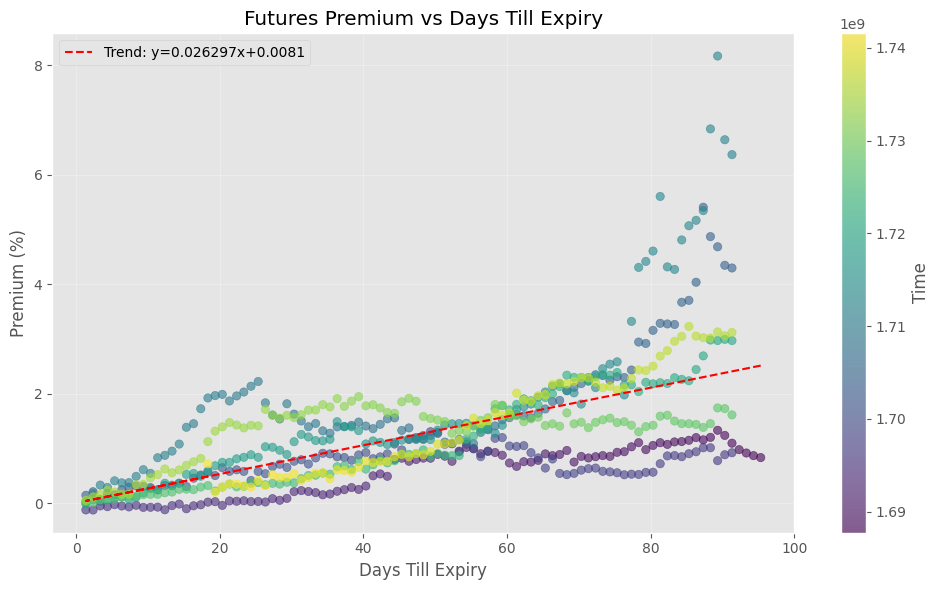

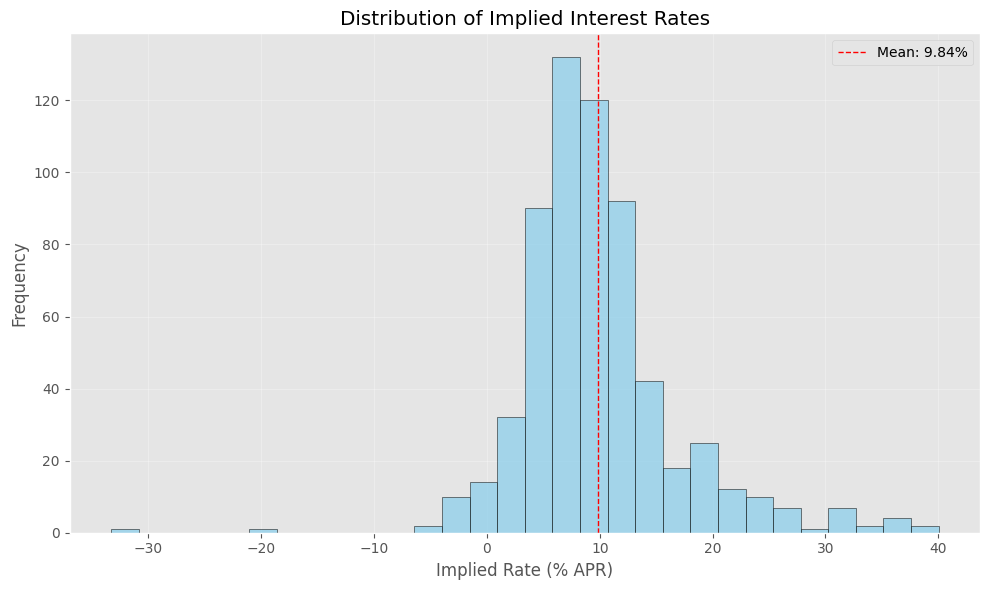


Summary Statistics:


,premium_pct_mean,premium_pct_std,premium_pct_min,premium_pct_max,premium_pct_count,implied_rate_pct_mean,implied_rate_pct_std,implied_rate_pct_min,implied_rate_pct_max
Contract,,,,,,,,,
ETHUSDT_230929,0.549481,0.458556,-0.123230,1.333175,95,2.286087,5.243123,-33.307661,6.817853
ETHUSDT_231229,0.716041,0.292873,0.038998,1.308165,91,7.686172,5.357813,2.448021,40.026287
ETHUSDT_240329,1.815475,1.057093,0.025558,5.408561,91,17.033013,8.512001,6.995685,37.938011
ETHUSDT_240628,1.827401,1.730377,-0.013332,8.170818,91,12.276689,5.334580,-3.649778,32.090624
ETHUSDT_240927,1.157285,0.912134,0.017442,2.993962,91,7.842885,2.514703,2.728220,12.356426
ETHUSDT_241227,1.345654,0.491648,0.053073,1.948376,91,13.049728,5.606234,5.750101,25.046399
ETHUSDT_250328,1.490225,0.936584,0.204414,3.230343,74,8.881174,2.827888,3.855256,14.297905



Sample Results:


,Timestamp,Contract,spot_price,futures_price,days_till_expiry,premium_pct,implied_rate_pct
0,2023-06-26,ETHUSDT_230929,1858.97,1874.49,95.333333,0.834871,3.183177
1,2023-06-27,ETHUSDT_230929,1889.58,1906.03,94.333333,0.870564,3.353858
2,2023-06-28,ETHUSDT_230929,1828.02,1844.81,93.333333,0.918480,3.575518
3,2023-06-29,ETHUSDT_230929,1851.99,1870.13,92.333333,0.979487,3.853139
4,2023-06-30,ETHUSDT_230929,1933.79,1955.01,91.333333,1.097327,4.361417


In [6]:
# Run the analysis for ETHUSDT
result_df, summary = analyzer.run_analysis(asset='ETHUSDT')

# Display the summary
print("\nSummary Statistics:")
display(summary)

# Display the first few rows of results
print("\nSample Results:")
display(result_df.head())